# Vectorize Phrase
<div style="position: absolute; right:0;top:0"><a href="./vectorizer_index.doc.ipynb" style="text-decoration: none"> <font size="5">←</font></a>
<a href="../evaluation.ipynb" style="text-decoration: none"> <font size="5">↑</font></a></div>

`Description`

---
## Setup and Settings
---

In [1]:
from __init__ import init_vars
init_vars(vars(), ('info', {}), ('runvars', {}), ('num_docs', 400), ('embedding_dim', 200))

import numpy as np
from scipy import sparse

import data
import config
from base import nbprint
from util import ProgressIterator
from widgetbase import nbbox

from embedding.main import get_model

from vectorizer.widgets import phrase_vector_picker
from vectorizer.plots import plot_matrix

if RUN_SCRIPT: phrase_vector_picker(info)

Data Name,Classic4 (exists)
Vector,missing
Version,Pbert
Name,BERT
Model,None


FloatProgress(value=0.0, bar_style='info', layout=Layout(visibility='hidden'), max=1.0, style=ProgressStyle(de…

---
## Phrase Embedding Matrix
---



FloatProgress(value=0.0, bar_style='info', layout=Layout(visibility='hidden'), max=1.0, style=ProgressStyle(de…

Extracting Features
Making Dataloader
Making Matrix
0/1
Extracting Features
Making Dataloader
Making Matrix
63/64


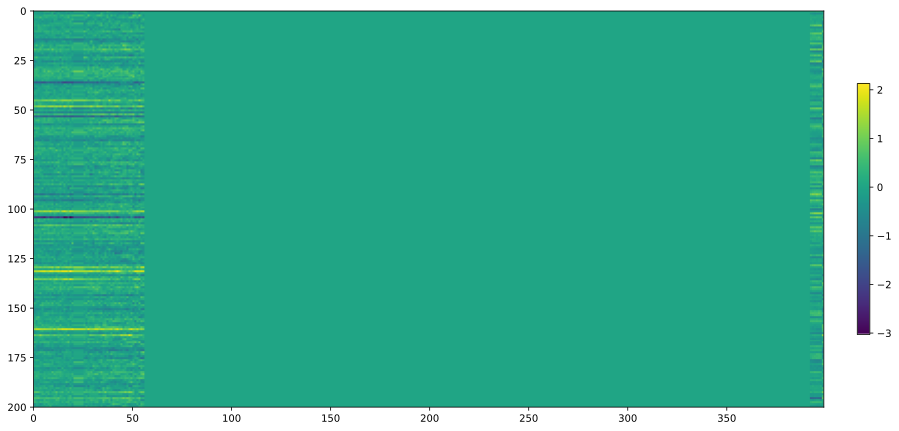

In [6]:
def make_phrase_mat(info, runvars):
    model = get_model(info)
    batch = []
    batchsize = 0
    min_batchsize = 4096
    current_idx = 0
    
    # Count documents
    num_documents = 0
    with data.document_reader(info) as documents:
        for document in ProgressIterator(documents, 'Counting Documents'):
            num_documents += 1
            
    # Create a zero matrix
    phrase_mat_shape = (model.vector_size(), num_documents)
    phrase_mat = np.zeros(phrase_mat_shape)
    
    with data.document_reader(info) as documents:
        progress_iterator = ProgressIterator(documents, 'Vectorizing Documents')
        for document in progress_iterator:
            batch.append(document['text'])
            batchsize += 1
            
            if batchsize >= min_batchsize:
                phrase_mat[:,current_idx:current_idx+batchsize] = model.embed(batch).T
                current_idx += batchsize
                batchsize = 0
                batch = []
                
        if batchsize > 0:
            phrase_mat[:,current_idx:current_idx+batchsize] = model.embed(batch).T
    runvars['phrase_mat'] = phrase_mat

if RUN_SCRIPT:
    nbbox(mini=True)
    make_phrase_mat(info, runvars)
    plot_matrix(runvars['phrase_mat'][:embedding_dim,1:num_docs])

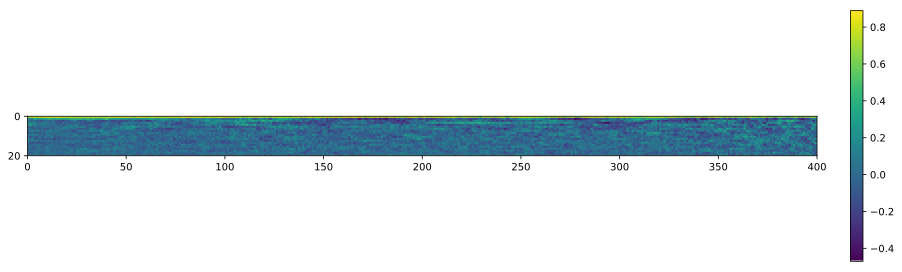

In [5]:
if RUN_SCRIPT:
    from sklearn import decomposition
    svd = decomposition.TruncatedSVD(n_components=20, n_iter=200, random_state=42)
    X2 = svd.fit_transform(runvars['phrase_mat'].T)  
    plot_matrix(X2.T[:,:num_docs])